In [55]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.result import marginal_counts
from math import pi
%matplotlib inline

<IPython.core.display.Latex object>

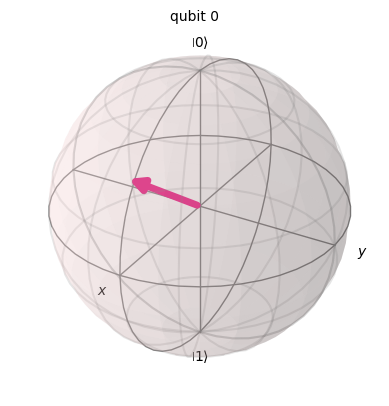

In [56]:
# Initializing information or |q0>
psi = random_statevector(2)
init_gate = Initialize(psi)
init_gate.label = "ket-psi"
display(array_to_latex(psi, prefix="|\\psi\\rangle = "))
plot_bloch_multivector(psi)

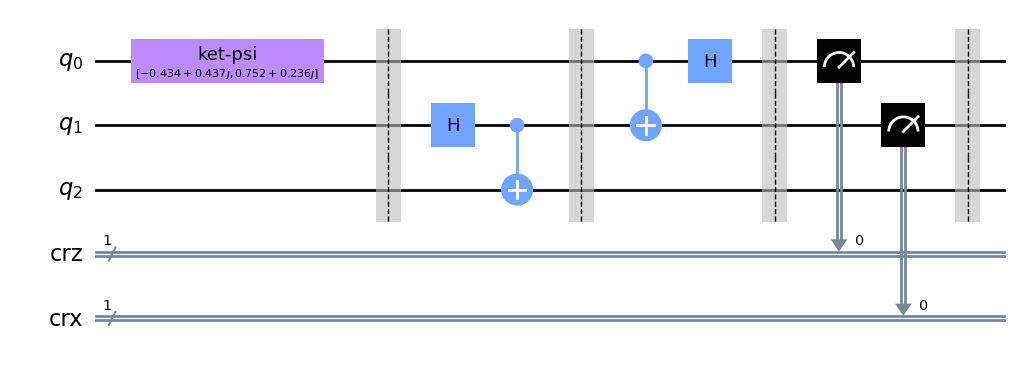

In [57]:
# Primary setup
qr = QuantumRegister(3, name='q')
crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
ckt = QuantumCircuit(qr, crz, crx)

# assigning ket-psi into |q0>
ckt.append(init_gate, [0])

# EPR pair generation
ckt.barrier()
ckt.h(1)
ckt.cx(1,2)
ckt.barrier()

# Bell state projection on Alice's end
ckt.cx(0, 1)
ckt.h(0)
ckt.barrier()

# measurement
ckt.measure(0, crz)
ckt.measure(1, crx)
ckt.barrier()

ckt.draw(output='mpl')

crz crx:  {'0 0': 1}


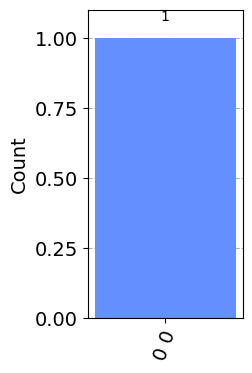

In [58]:
# Getting the measurement
simulator = Aer.get_backend('qasm_simulator')
result = execute(ckt, backend=simulator, shots=1).result()
counts = result.get_counts()
print("crz crx: ",counts)
plot_histogram(counts, figsize=(2,4))

In [59]:
# Alice's message to Bob
msg = " "
for i,j in counts.items():
  msg = str(i)
msg

'0 0'

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


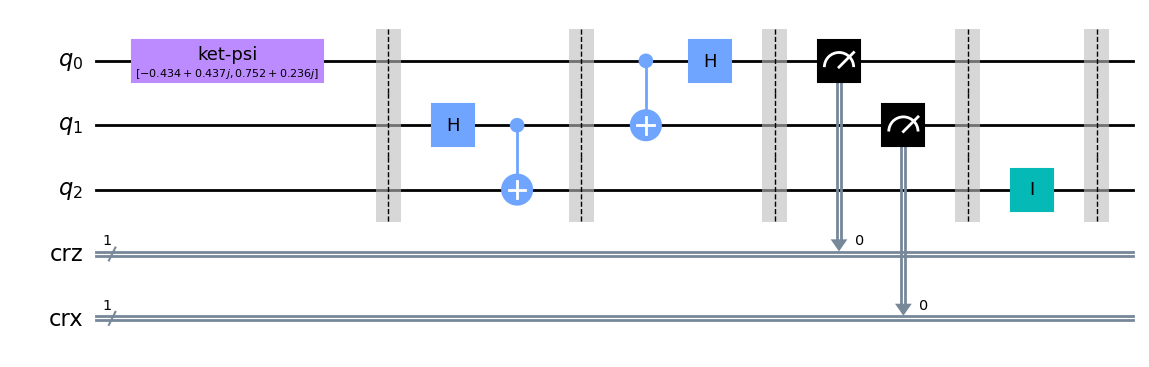

In [60]:
# Now, Bob's decoding on his end
if msg=='0 0':
  ckt.id(2)
elif msg=='0 1':
  ckt.x(2)
elif msg=='1 0':
  ckt.z(2)
else:
  ckt.z(2)
  ckt.x(2)
ckt.barrier()

ckt.draw(output='mpl')

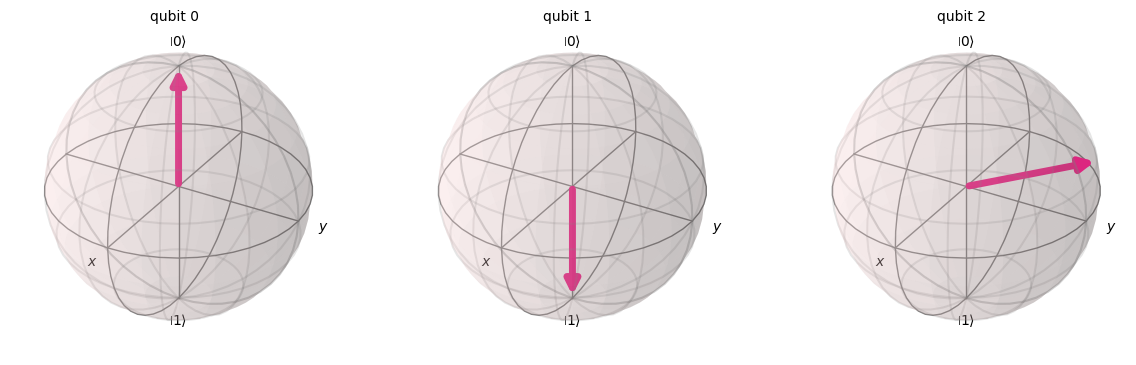

In [61]:
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(ckt, backend=simulator).result().get_statevector()
plot_bloch_multivector(statevector)

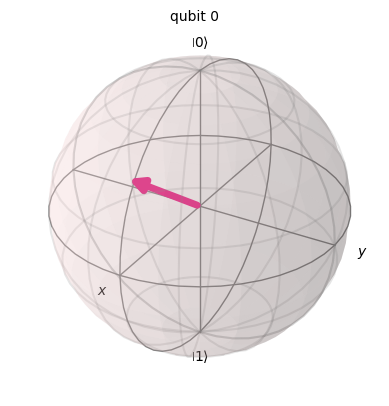

In [62]:
# Initial Source
plot_bloch_multivector(psi)

Qubit 2 bocomes the source information